# Sequential expression of markers

In [1]:
# Libraries
suppressPackageStartupMessages(library(tidyverse))

# Global
options(warn = -1, repr.plot.width = 10, repr.plot.height = 12)

# Sripts
source("summarize.R")

# Data
load("DF.Rdata")

glimpse(DF)

Observations: 411
Variables: 23
$ registry_id            <dbl> 20060035601, 19970063502, 20040008703, 2007008…
$ pt_stage               <fct> T1, T1, T2, T1, T1, T1, Tis, T1, T2, Ta, Ta, T…
$ sp_id                  <chr> "06-S-4802", "07-S-3788", "07-S-8931", "07-S-6…
$ ck56                   <dbl> 60, 10, 90, NA, NA, 5, NA, 0, 0, 40, NA, 40, 4…
$ ck20                   <dbl> 0, 0, 0, NA, 0, 70, NA, 80, 0, 0, NA, 0, 10, N…
$ cd44                   <dbl> 70, 60, NA, NA, NA, 40, NA, 5, NA, 60, NA, NA,…
$ gata3                  <dbl> 100, 100, 100, NA, 100, 100, NA, 100, 100, 100…
$ er                     <dbl> 40, 20, NA, NA, 0, 0, 0, 0, 0, 5, NA, NA, 0, N…
$ her2                   <dbl> 0, 5, NA, NA, 60, 30, NA, 40, 60, 60, NA, 30, …
$ uroplakin              <dbl> 5, 20, NA, NA, NA, 0, NA, 10, NA, 0, NA, NA, 0…
$ sex                    <fct> Male, Male, Male, Male, Male, Male, Female, Ma…
$ death                  <fct> Dead, Alive, Dead, Alive, Alive, Alive, Alive,…
$ progression_stage_

In [2]:
# A function to define which statistics (v.g., median, max value) will be used for summarizing biomarkers expression
# If needed, changing this function will update the approach for the entire analysis
summarize_biomarker <- function(x) { mean(x, na.rm = TRUE) }

# Tidying up the data and summarizing expression
SEQ <- DF %>% 
  group_by(registry_id, sp_id) %>% 
      summarize(
        ck56 = summarize_biomarker(ck56),
        cd44 = summarize_biomarker(cd44),
        ck20 = summarize_biomarker(ck20),
        er = summarize_biomarker(er),
        her2 = summarize_biomarker(her2),
        gata3 = summarize_biomarker(gata3),
        uroplakin = summarize_biomarker(uroplakin),
        pt_stage = unique(pt_stage),
        fu_mo = unique(fu_mo),
        recurrence_next = unique(recurrence_next),
        recurrence_any = unique(recurrence_any),
        progression_grade_next = unique(progression_grade_next),
        progression_grade_any = unique(progression_grade_any),
        progression_stage_next = unique(progression_stage_next),
        progression_stage_any = unique(progression_stage_any),
        date_dx = unique(date_dx)
    ) %>% 
    arrange(date_dx) %>% 
    mutate(sequence = row_number()) %>% 
    ungroup() %>% 
    mutate(sequence = factor(sequence))

glimpse(SEQ)

Observations: 128
Variables: 19
$ registry_id            <dbl> 19870070301, 19870070301, 19910069001, 1991006…
$ sp_id                  <chr> "05-S-4662", "07-S-11432", "07-S-429", "94-S-1…
$ ck56                   <dbl> 100.000000, 52.500000, 17.500000, NaN, 18.3333…
$ cd44                   <dbl> 80.000000, 70.000000, 20.000000, NaN, 90.00000…
$ ck20                   <dbl> 0.000000, 17.500000, 100.000000, NaN, 3.333333…
$ er                     <dbl> 0.0000000, 0.0000000, 0.0000000, NaN, 0.000000…
$ her2                   <dbl> 6.666667, 45.000000, 65.000000, NaN, 0.000000,…
$ gata3                  <dbl> 63.33333, 100.00000, 100.00000, NaN, 100.00000…
$ uroplakin              <dbl> 0.000000, 10.000000, 45.000000, NaN, 5.000000,…
$ pt_stage               <fct> Ta, Ta, Tis, NA, Ta, Ta, Ta, T1, T1, T2, Ta, T…
$ fu_mo                  <dbl> 274.9, 274.9, 230.2, 230.2, 117.5, 117.5, 117.…
$ recurrence_next        <fct> No tumor recurrence, No tumor recurrence, No t…
$ recurrence_any    

In [3]:
# A function to plot a panel of sequencial biomarker expression by outcome
plot_serial_panel <- function(data, biomarker) {
  
  biomarker = enquo(biomarker)
  df <- data %>% 
    mutate(biomarker = !! biomarker)
  
A <- df %>% 
  filter(!is.na(recurrence_next)) %>% 
  plot_serial(x = sequence, y = biomarker, group = registry_id, color = recurrence_next) +
  labs(title = "Tumor recurrence at next biopsy", tag = "A") +
  theme(legend.position = "none")

B <- df %>% 
  filter(!is.na(recurrence_any)) %>% 
  plot_serial(x = sequence, y = biomarker, group = registry_id, color = recurrence_any) +
  labs(title = "Tumor recurrence at any biopsy", tag = "B") +
  theme(legend.position = "none")

C <- df %>% 
  filter(!is.na(progression_grade_next)) %>% 
  plot_serial(x = sequence, y = biomarker, group = registry_id, color = progression_grade_next) +
  labs(title = "Tumor grade progression at next biopsy", tag = "C") +
  theme(legend.position = "none")

D <- df %>% 
  filter(!is.na(progression_grade_any)) %>% 
  plot_serial(x = sequence, y = biomarker, group = registry_id, color = progression_grade_any) +
  labs(title = "Tumor grade progression at any biopsy", tag = "D") +
  theme(legend.position = "none")

E <- df %>% 
  filter(!is.na(progression_stage_next)) %>% 
  plot_serial(x = sequence, y = biomarker, group = registry_id, color = progression_stage_next) +
  labs(title = "Tumor stage progression at next biopsy", tag = "C") +
  theme(legend.position = "none")

F <- df %>% 
  filter(!is.na(progression_stage_any)) %>% 
  plot_serial(x = sequence, y = biomarker, group = registry_id, color = progression_stage_any) +
  labs(title = "Tumor stage progression at any biopsy", tag = "D") +
  theme(legend.position = "none")

Fig_Serial <- gridExtra::grid.arrange(
  A, B, C, D, E, F,
  ncol = 2
)

return(Fig_Serial)

}

## CK5/6

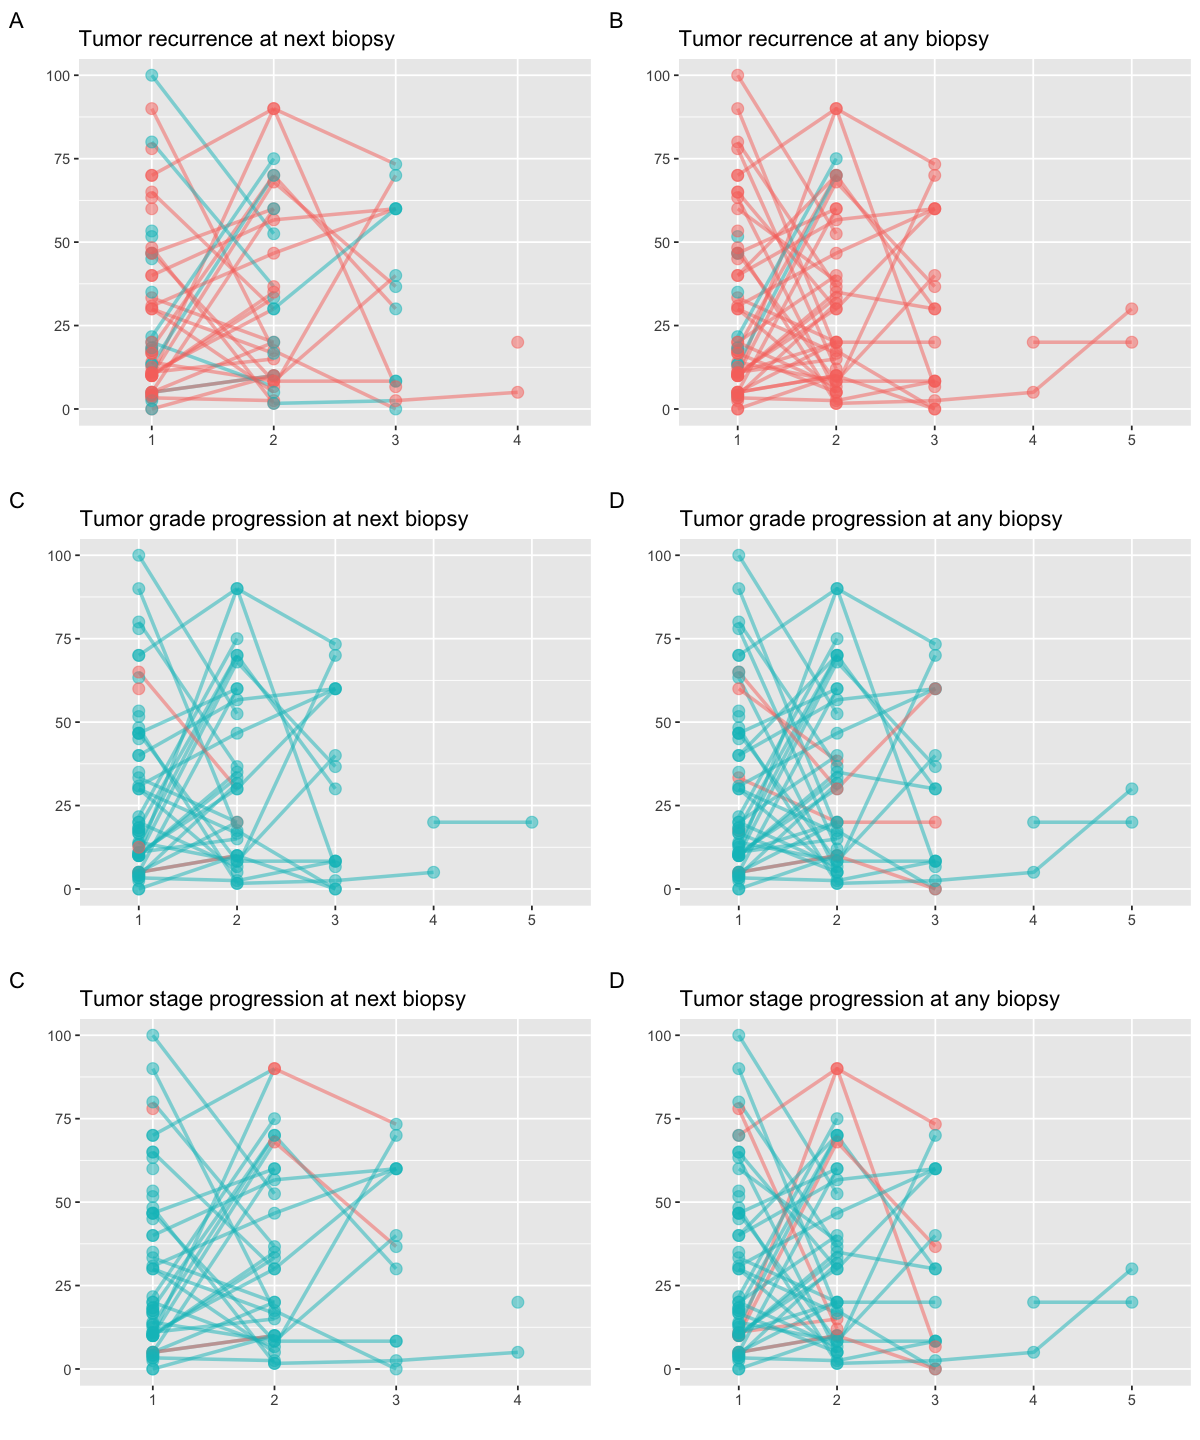

In [4]:
SEQ_BIOMARKER <- SEQ %>% plot_serial_panel(ck56)
ggsave("Figs/BL-NMIBUC-SEQ-CK56.png", SEQ_BIOMARKER, width = 10, height = 12, units = "in")

## CD44

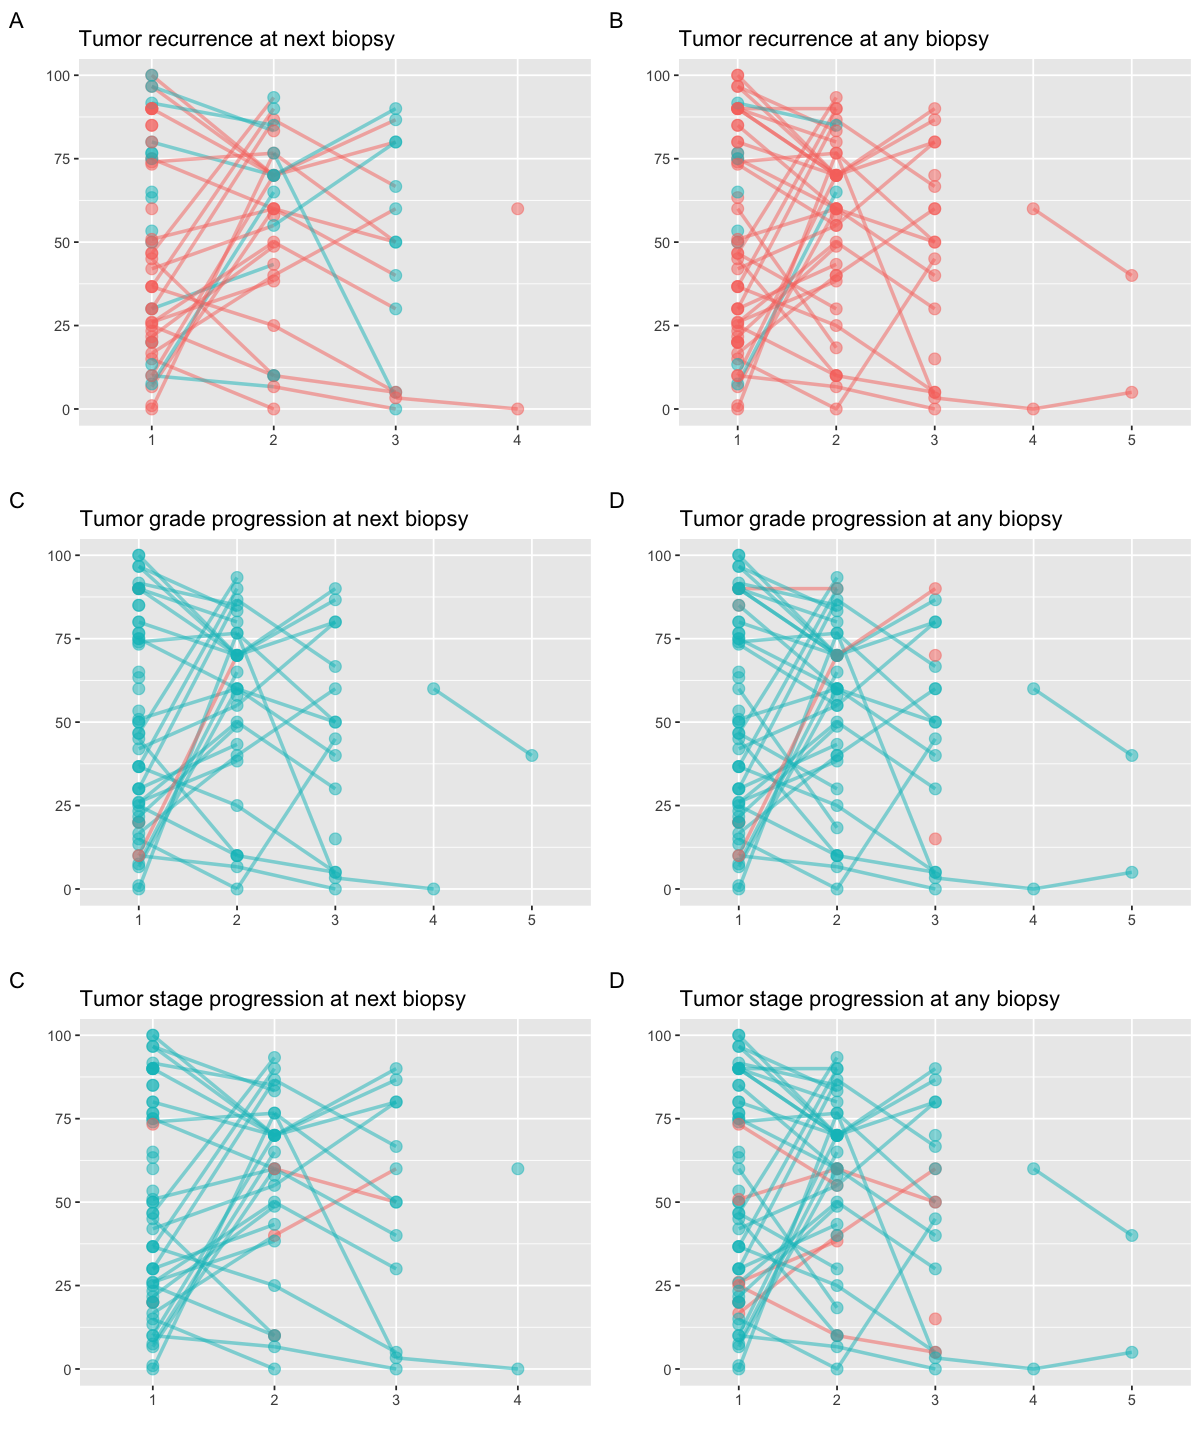

In [5]:
SEQ_BIOMARKER <- SEQ %>% plot_serial_panel(cd44)
ggsave("Figs/BL-NMIBUC-SEQ-CD44.png", SEQ_BIOMARKER, width = 10, height = 12, units = "in")

## CK20

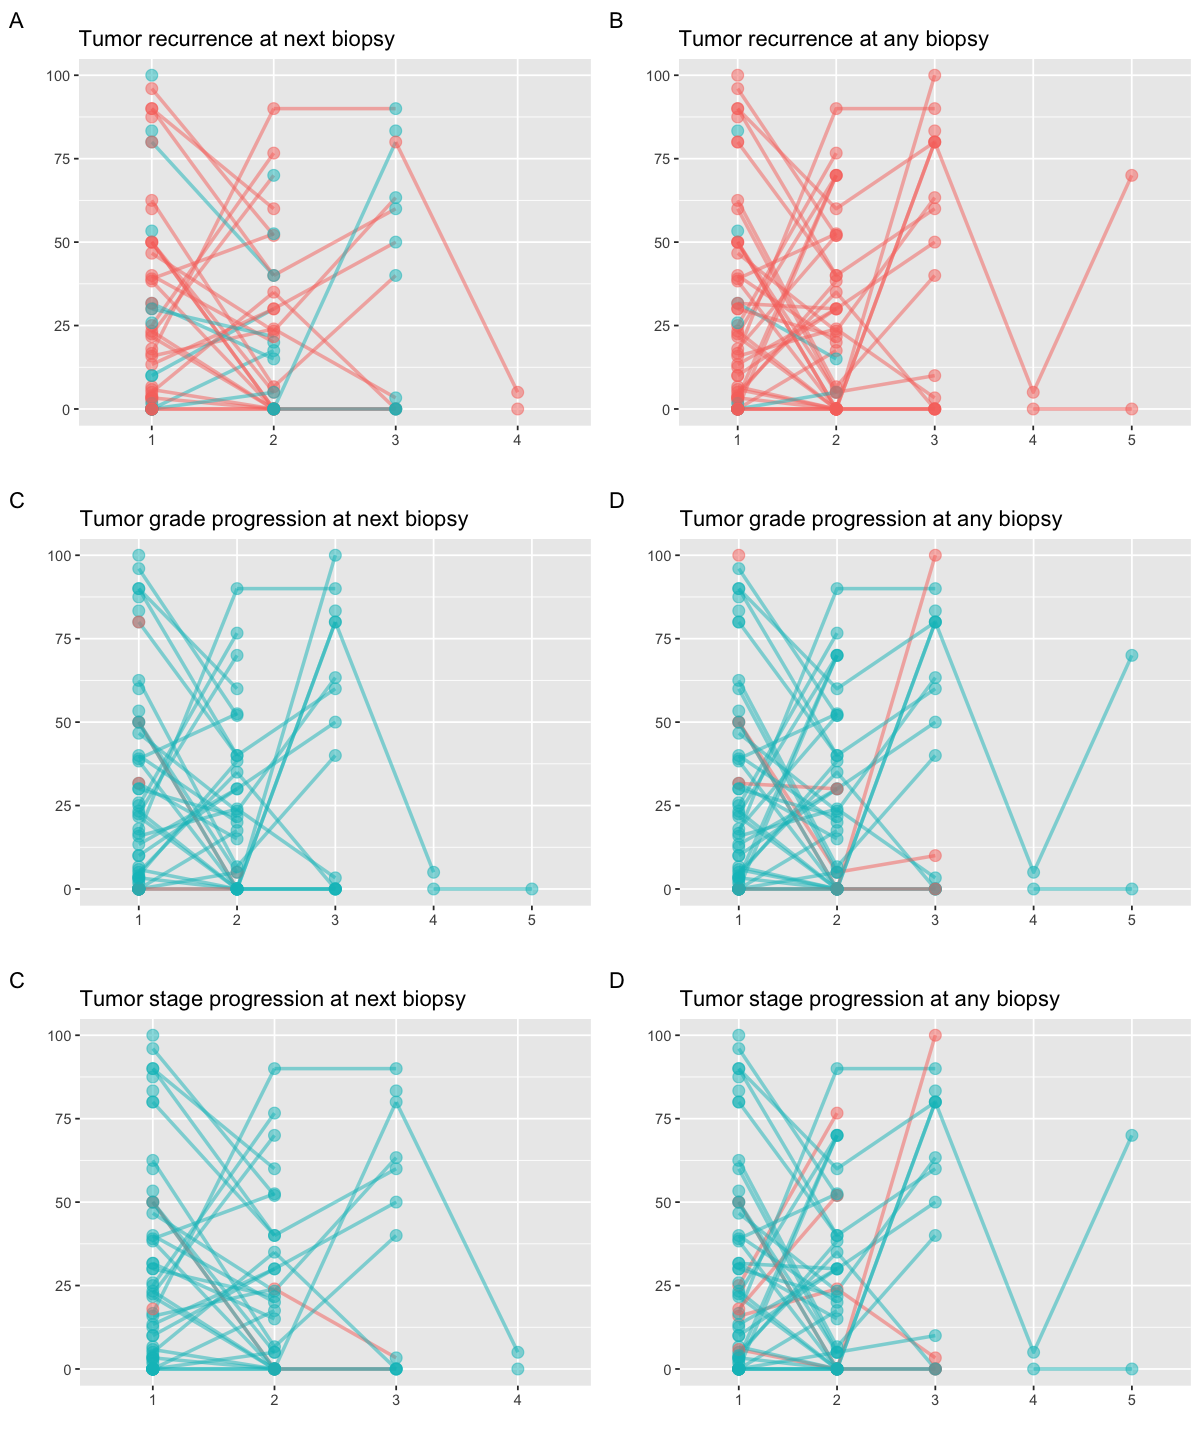

In [6]:
SEQ_BIOMARKER <- SEQ %>% plot_serial_panel(ck20)
ggsave("Figs/BL-NMIBUC-SEQ-CK20.png", SEQ_BIOMARKER, width = 10, height = 12, units = "in")

## ER

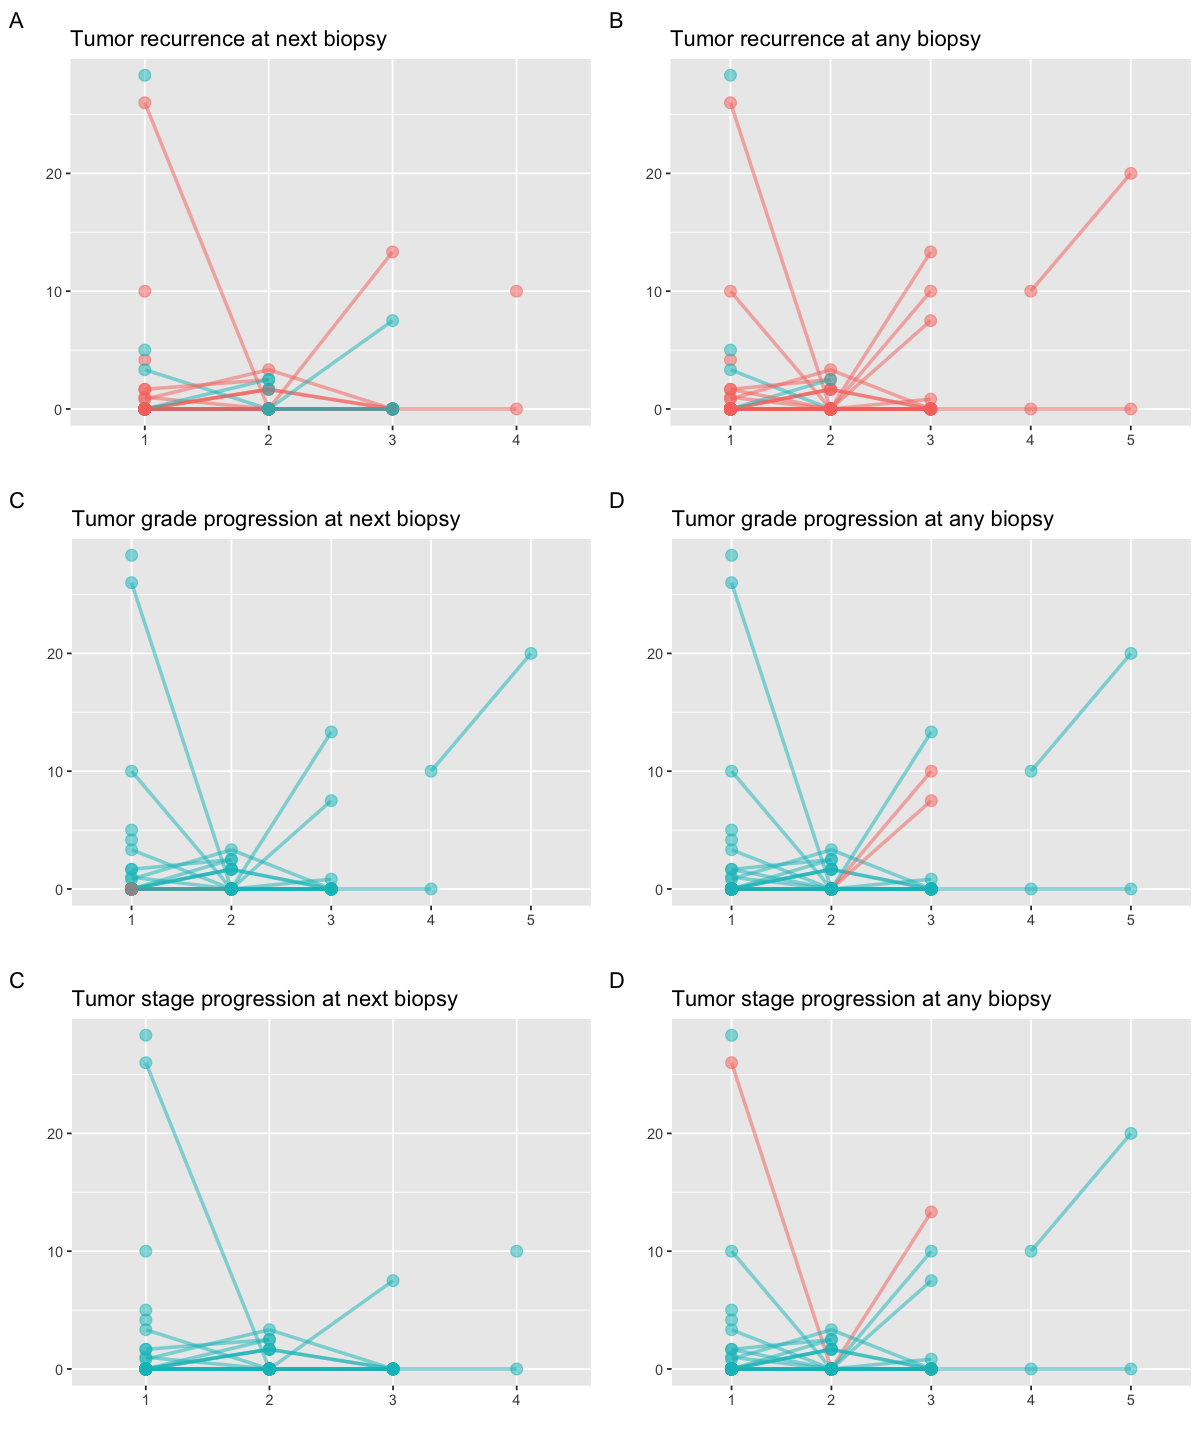

In [7]:
SEQ_BIOMARKER <- SEQ %>% plot_serial_panel(er)
ggsave("Figs/BL-NMIBUC-SEQ-ER.png", SEQ_BIOMARKER, width = 10, height = 12, units = "in")

## HER2

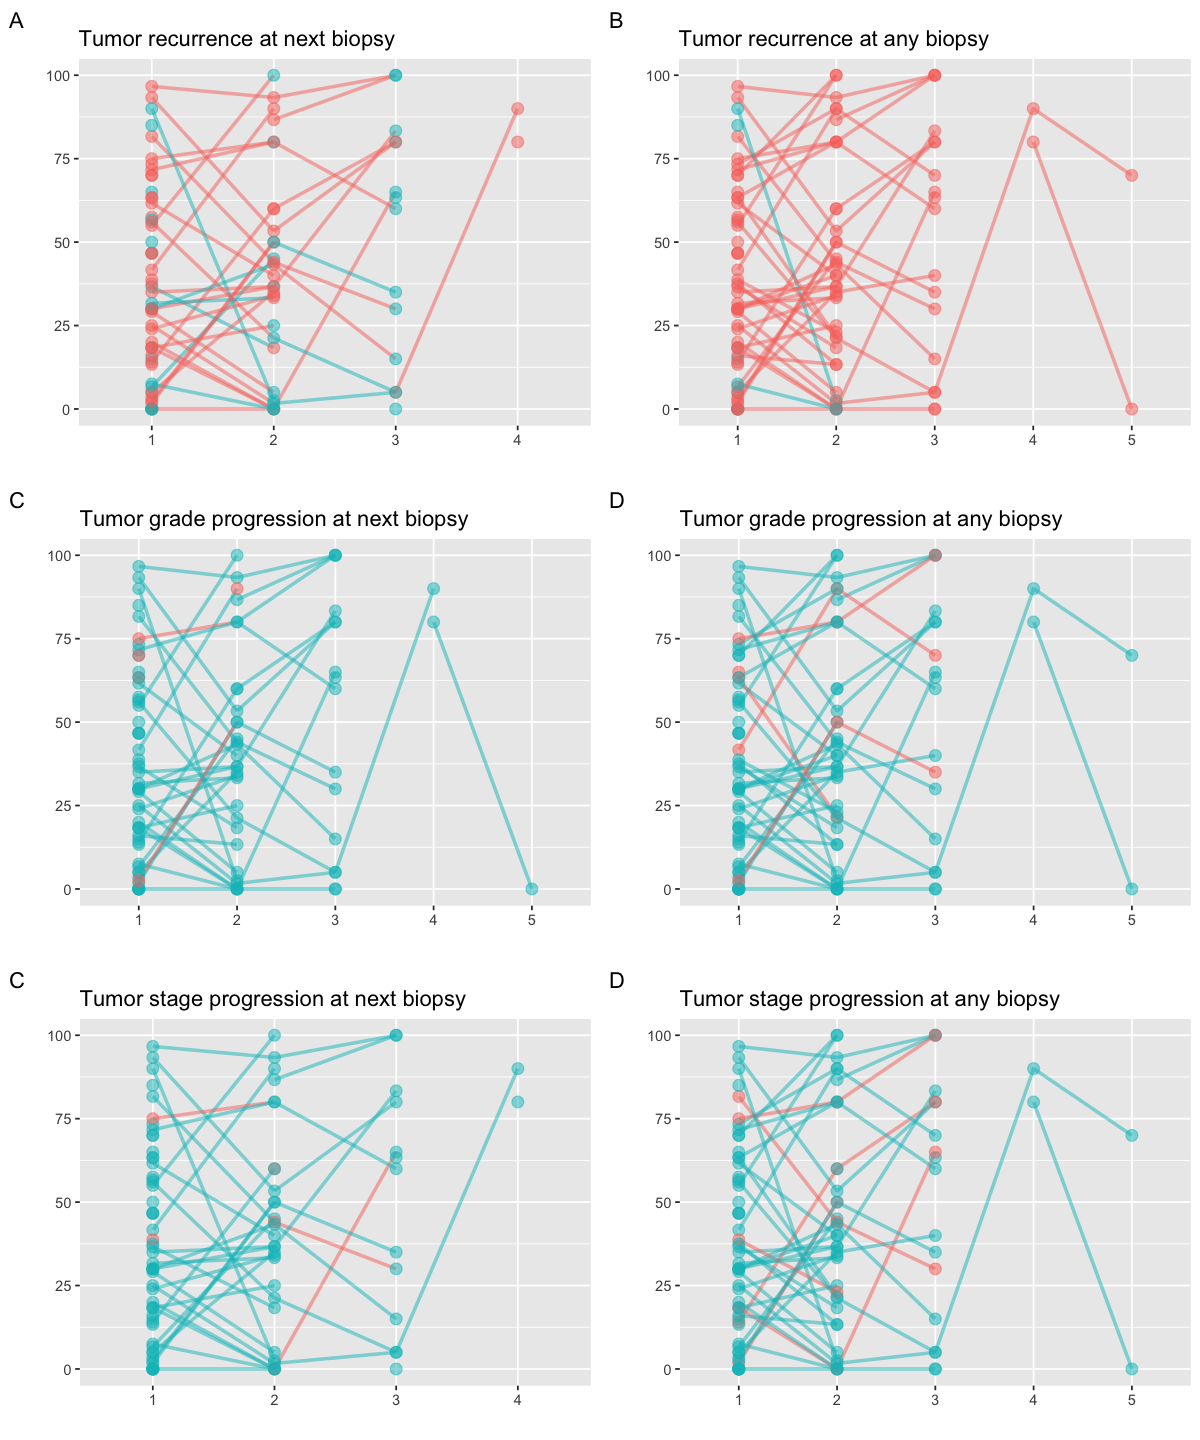

In [8]:
SEQ_BIOMARKER <- SEQ %>% plot_serial_panel(her2)
ggsave("Figs/BL-NMIBUC-SEQ-HER2.png", SEQ_BIOMARKER, width = 10, height = 12, units = "in")

## GATA3

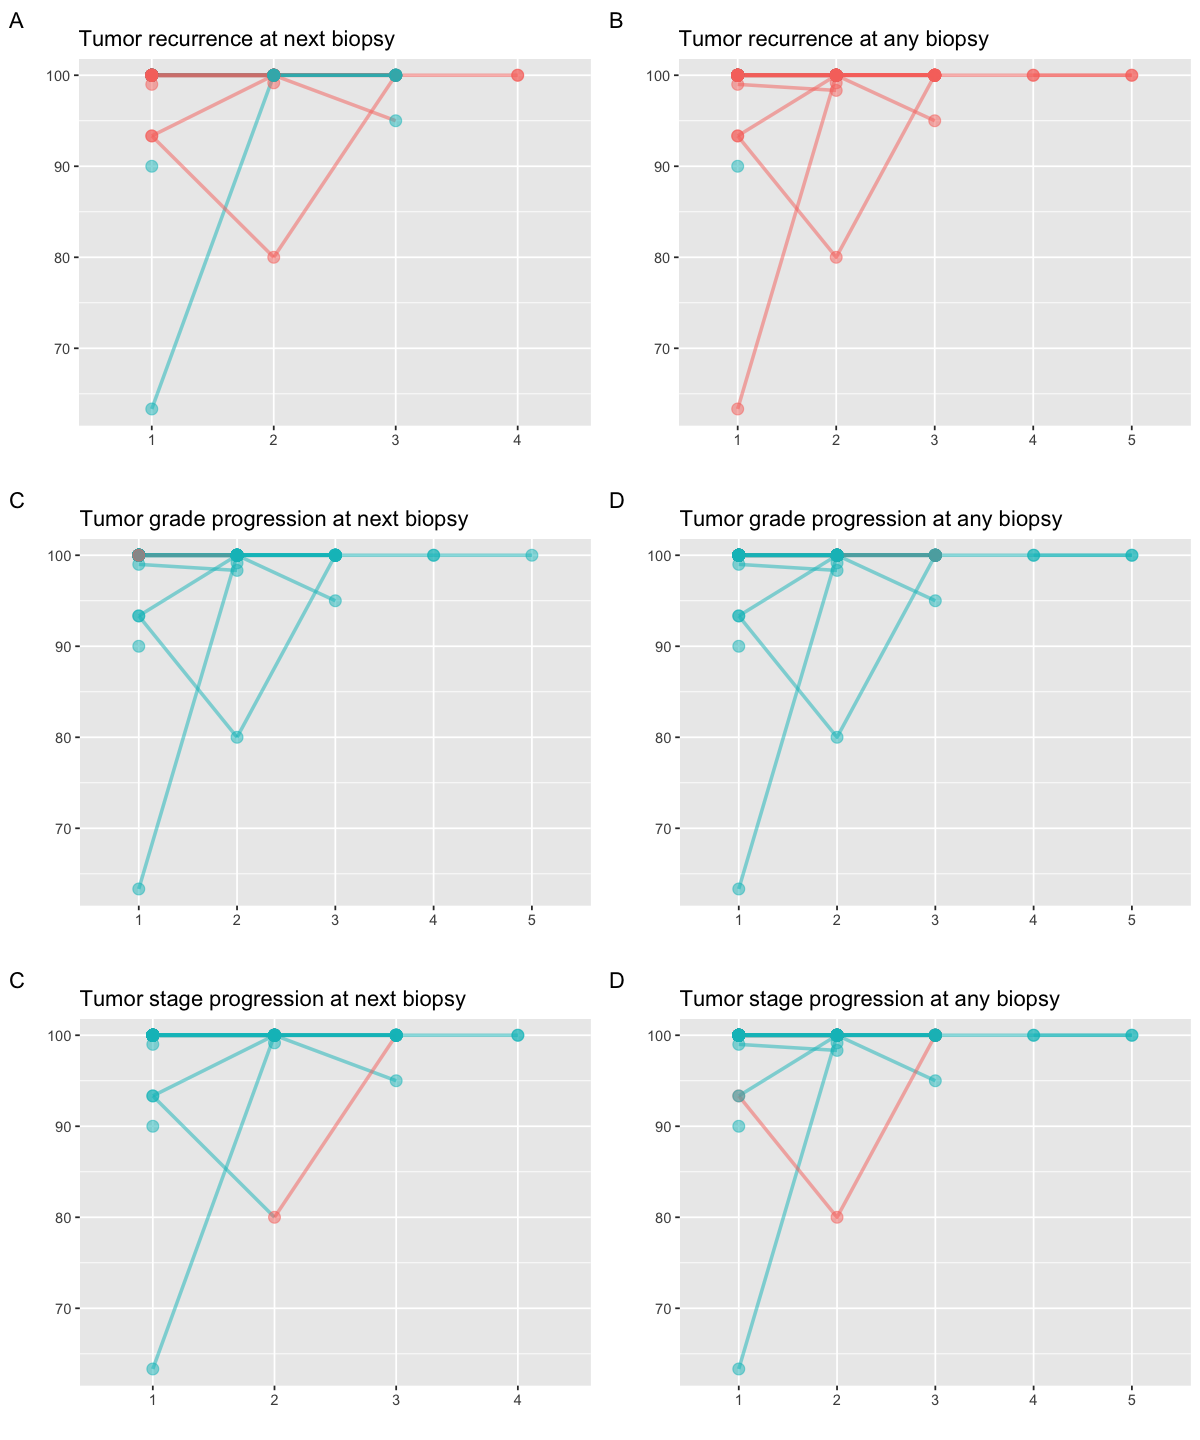

In [9]:
SEQ_BIOMARKER <- SEQ %>% plot_serial_panel(gata3)
ggsave("Figs/BL-NMIBUC-SEQ-GATA3.png", SEQ_BIOMARKER, width = 10, height = 12, units = "in")

## Uroplakin

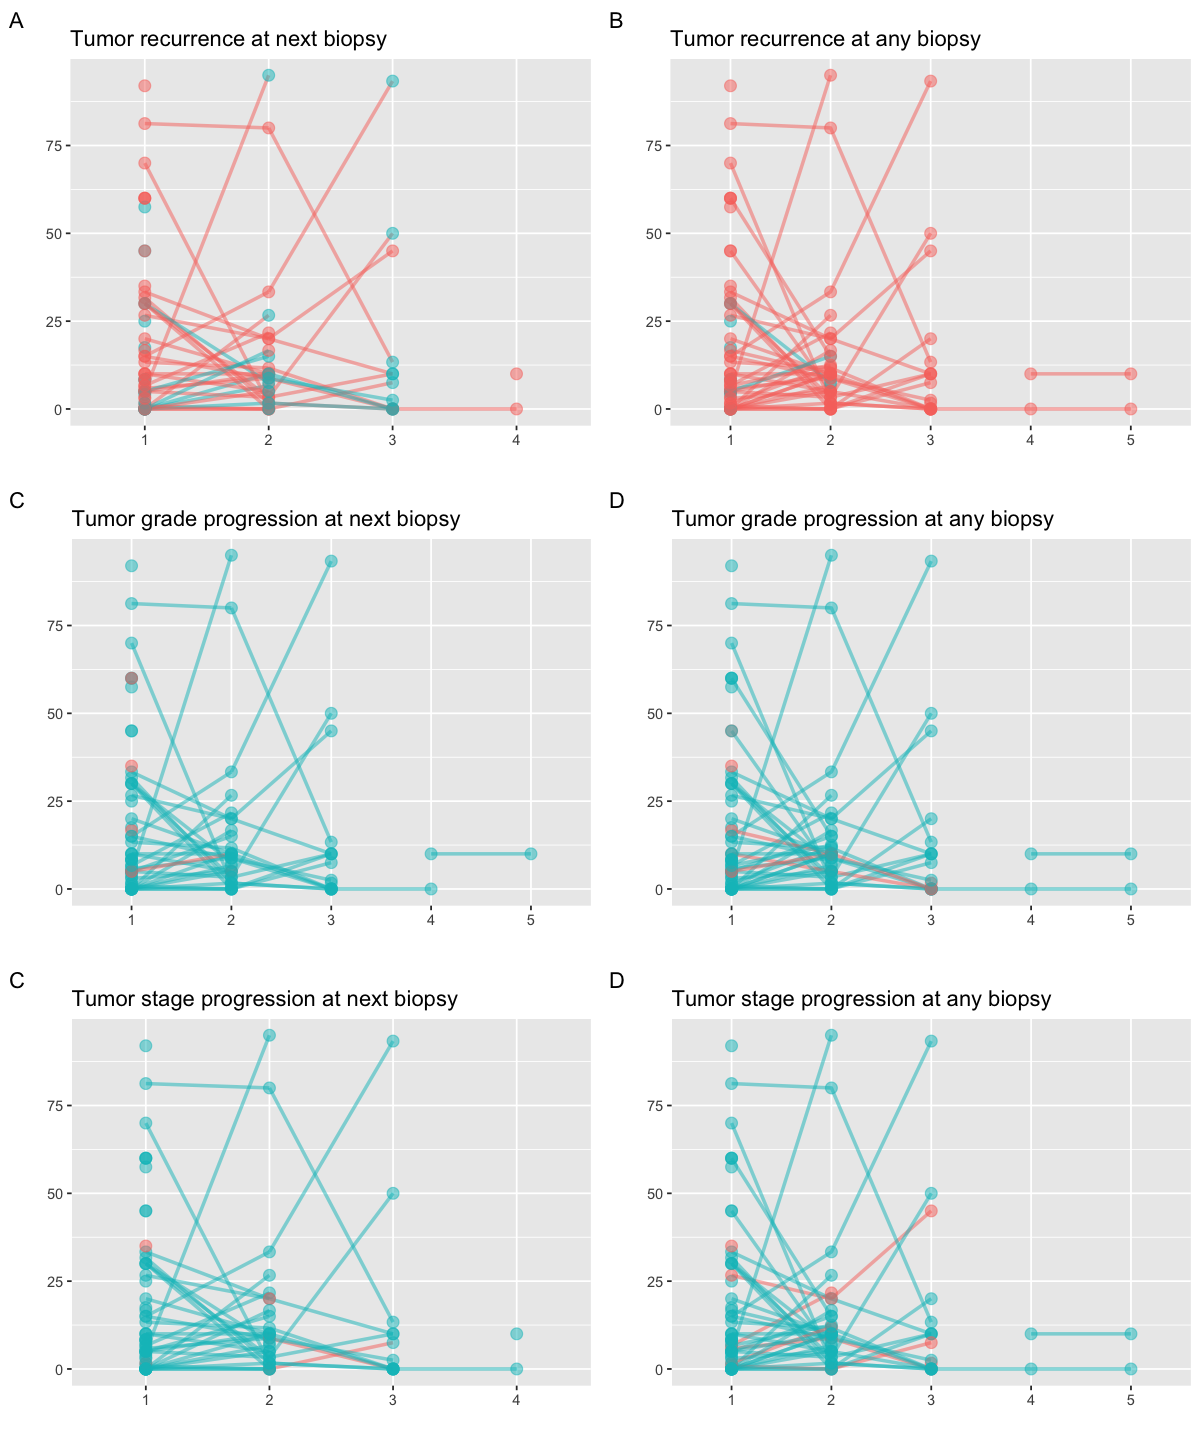

In [10]:
SEQ_BIOMARKER <- SEQ %>% plot_serial_panel(uroplakin)
ggsave("Figs/BL-NMIBUC-SEQ-UROPLAKIN.png", SEQ_BIOMARKER, width = 10, height = 12, units = "in")

## Combined plots
**Sequential expression of markers.** Each patient had between 2 and 5 sequential biopsies, shown in the x-axes. Mean percentages of positive cells are shown in the y-axes. Circles represent the expression value for each patient. Solid lines represent the trend between biopsies. No distinctive patterns were observed considering the expression across sequential biopsies. P values were calculated using the Kruskal-Wallis rank sum test.

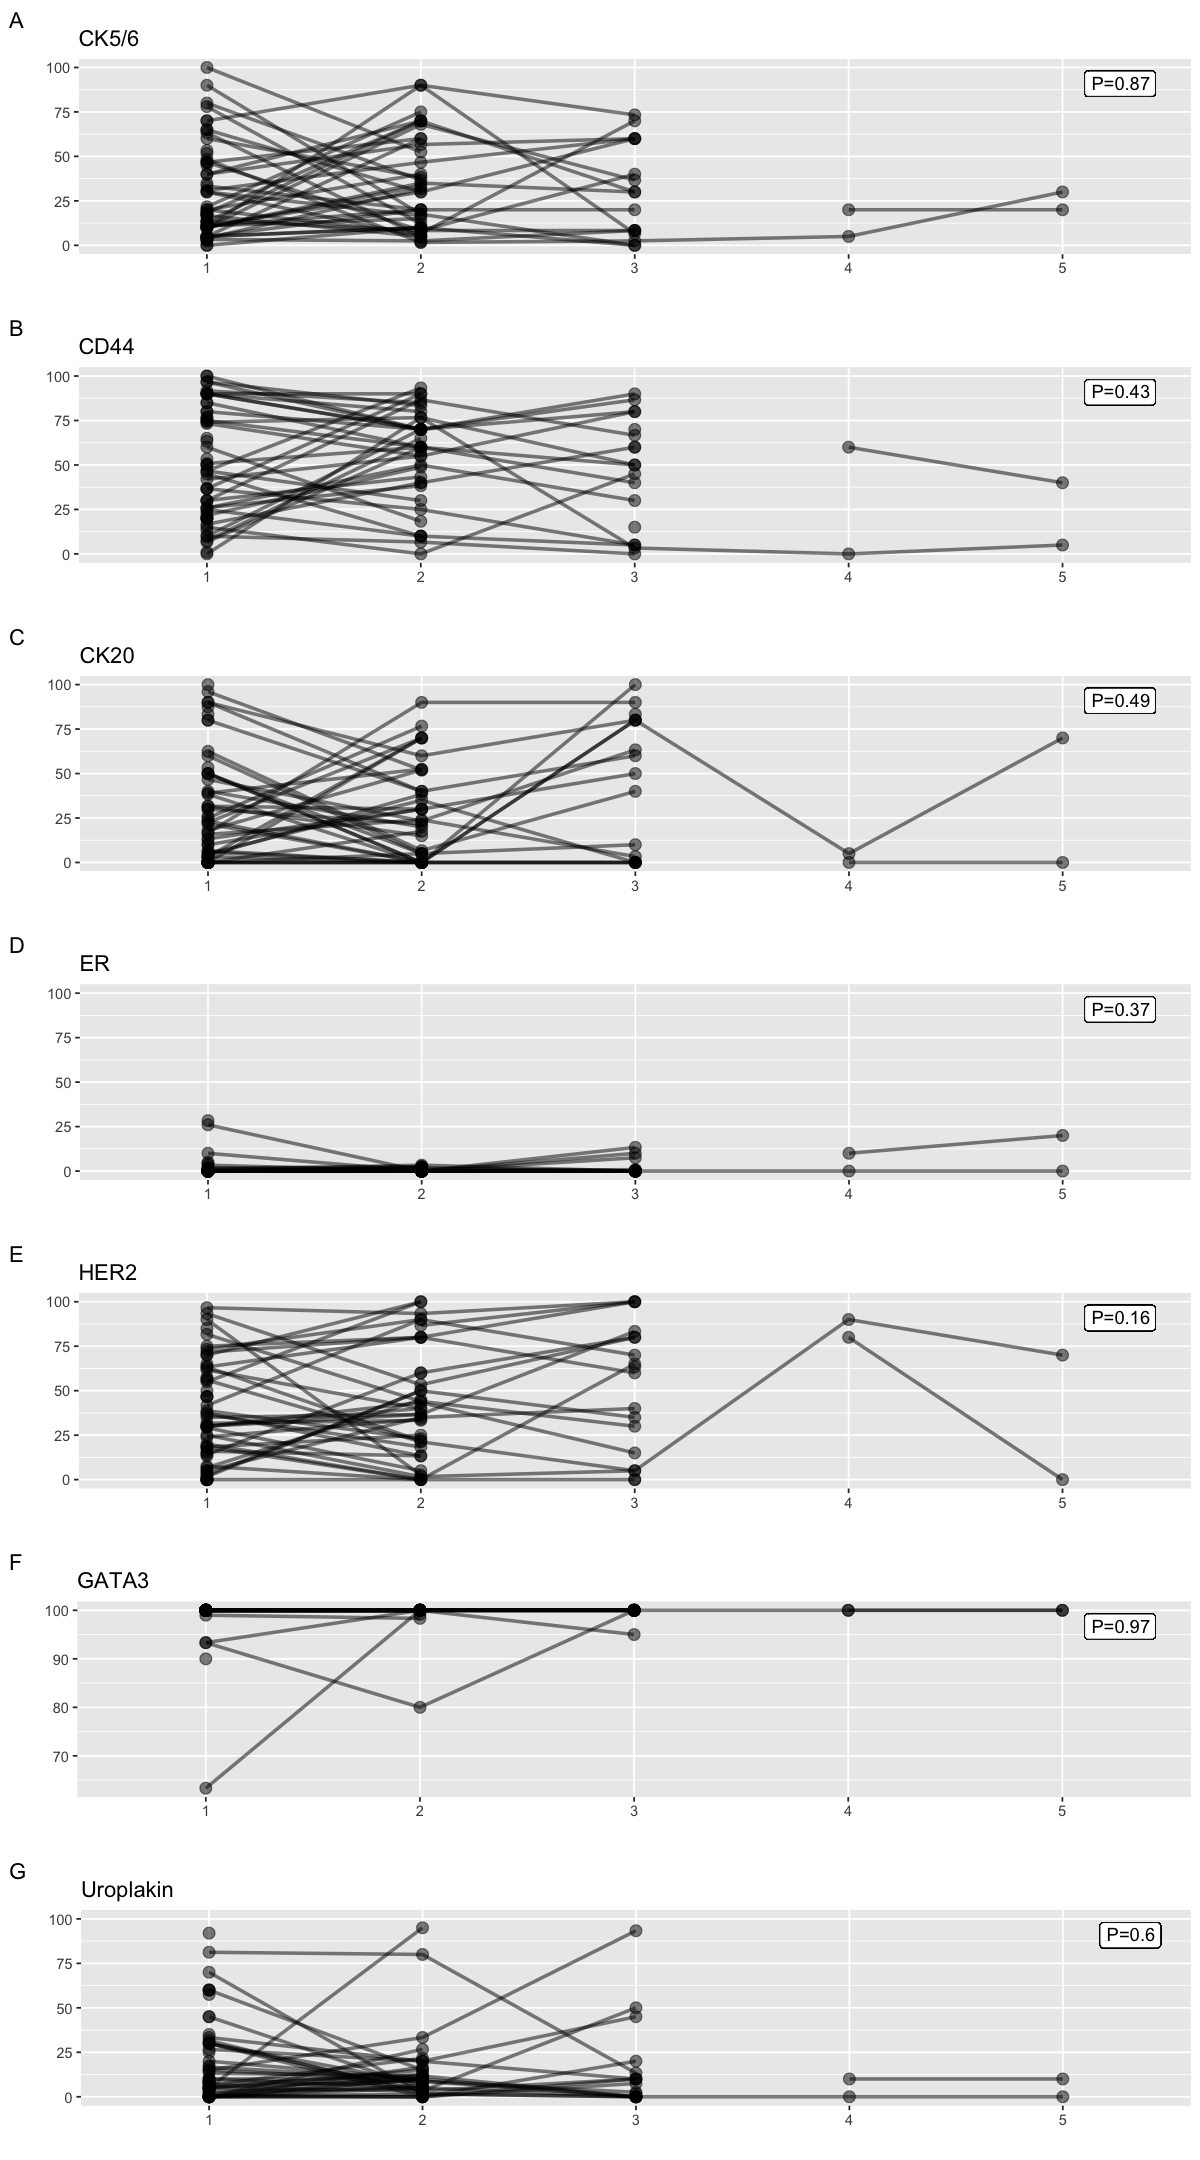

In [11]:
options(repr.plot.width = 10, repr.plot.height = 18)

SEQ_A <- SEQ %>% plot_ts(sequence, ck56, registry_id) +
  labs(title = "CK5/6",  tag = "A")

SEQ_B <- SEQ %>% plot_ts(sequence, cd44, registry_id) +
  labs(title = "CD44",  tag = "B")

SEQ_C <- SEQ %>% plot_ts(sequence, ck20, registry_id) +
  labs(title = "CK20",  tag = "C")

SEQ_D <- SEQ %>% plot_ts(sequence, er, registry_id) +
  labs(title = "ER",  tag = "D") +
  scale_y_continuous(limits = c(0, 100))

SEQ_E <- SEQ %>% plot_ts(sequence, her2, registry_id) +
  labs(title = "HER2",  tag = "E")

SEQ_F <- SEQ %>% plot_ts(sequence, gata3, registry_id) +
  labs(title = "GATA3",  tag = "F")

SEQ_G <- SEQ %>% plot_ts(sequence, uroplakin, registry_id) +
  labs(title = "Uroplakin",  tag = "G") +
  scale_y_continuous(limits = c(0, 100))

Plot_SEQ <- gridExtra::grid.arrange(
  SEQ_A, SEQ_B, SEQ_C, SEQ_D, SEQ_E, SEQ_F, SEQ_G,
  ncol = 1
)

In [12]:
ggsave(
    filename = "Figs/BL-NMIBUC-SEQ.png",
    Plot_SEQ,
    width = 10,
    height = 18,
    units = "in"
)